<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
<ipython-input-10-53478649aa64>:15: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  returns.index = pd.DatetimeIndex(returns.index).to_period('B')  # 'B' for business day frequency


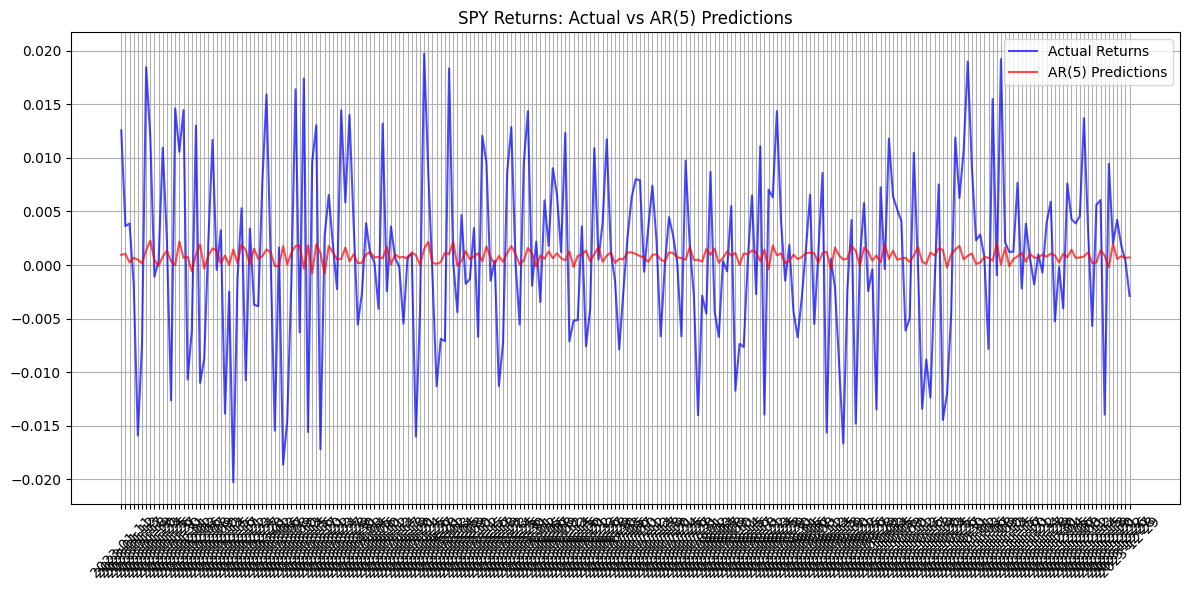


Model Statistics:
AIC: -1657.7603
BIC: -1640.2336

Autoregressive Coefficients:
Lag 1: 0.0467
Lag 2: -0.0549
Lag 3: -0.0112


In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import yfinance as yf

# Download some stock data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna()

# Convert returns to Series if it's a DataFrame and set frequency
if isinstance(returns, pd.DataFrame):
    returns = returns.squeeze()  # Convert DataFrame to Series
returns.index = pd.DatetimeIndex(returns.index).to_period('B')  # 'B' for business day frequency

# Fit AR(5) model
model = AutoReg(returns, lags=3)
results = model.fit()

# Make predictions
predictions = results.predict(start=5, end=len(returns)-1)

# Create figure
plt.figure(figsize=(12,6))

# Plot actual returns and predictions
plt.plot(returns.index.astype(str)[5:], returns[5:], 'b-', label='Actual Returns', alpha=0.7)
plt.plot(predictions.index.astype(str), predictions, 'r-', label='AR(5) Predictions', alpha=0.7)

# Add formatting
plt.title(f'{ticker} Returns: Actual vs AR(5) Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print model summary
print("\nModel Statistics:")
print(f"AIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")
print("\nAutoregressive Coefficients:")
for i, coef in enumerate(results.params[1:], 1):
    print(f"Lag {i}: {coef:.4f}")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


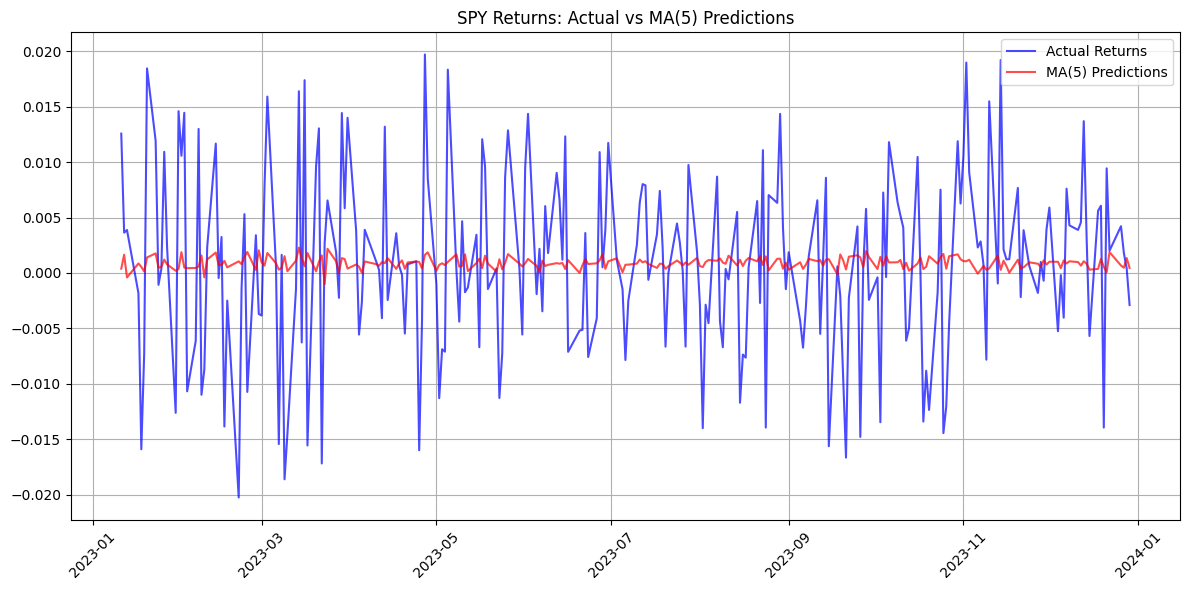


Model Statistics:
AIC: -1666.6873
BIC: -1642.0651

Moving Average Coefficients:
MA1: 0.0261
MA2: -0.0405
MA3: -0.0182
MA4: 0.0124
MA5: -0.0311


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Download data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna()

# Convert returns to Series if it's a DataFrame
if isinstance(returns, pd.DataFrame):
    returns = returns.squeeze()

# Fit MA model (order=(0,0,5) means MA(5))
model = ARIMA(returns, order=(0,0,5))
results = model.fit()

# Generate predictions
predictions = results.predict(start=5, end=len(returns)-1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(returns.index[5:], returns[5:], 'b-', label='Actual Returns', alpha=0.7)
plt.plot(predictions.index, predictions, 'r-', label='MA(5) Predictions', alpha=0.7)
plt.title(f'{ticker} Returns: Actual vs MA(5) Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print model statistics
print("\nModel Statistics:")
print(f"AIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")
print("\nMoving Average Coefficients:")
for i, coef in enumerate(results.maparams, 1):
    print(f"MA{i}: {coef:.4f}")

[*********************100%***********************]  1 of 1 completed
<ipython-input-13-556f3bec8e64>:17: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  returns.index = pd.DatetimeIndex(returns.index).to_period('B')
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:213: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  index = pd.period_range(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:213: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  index = pd.period_ran

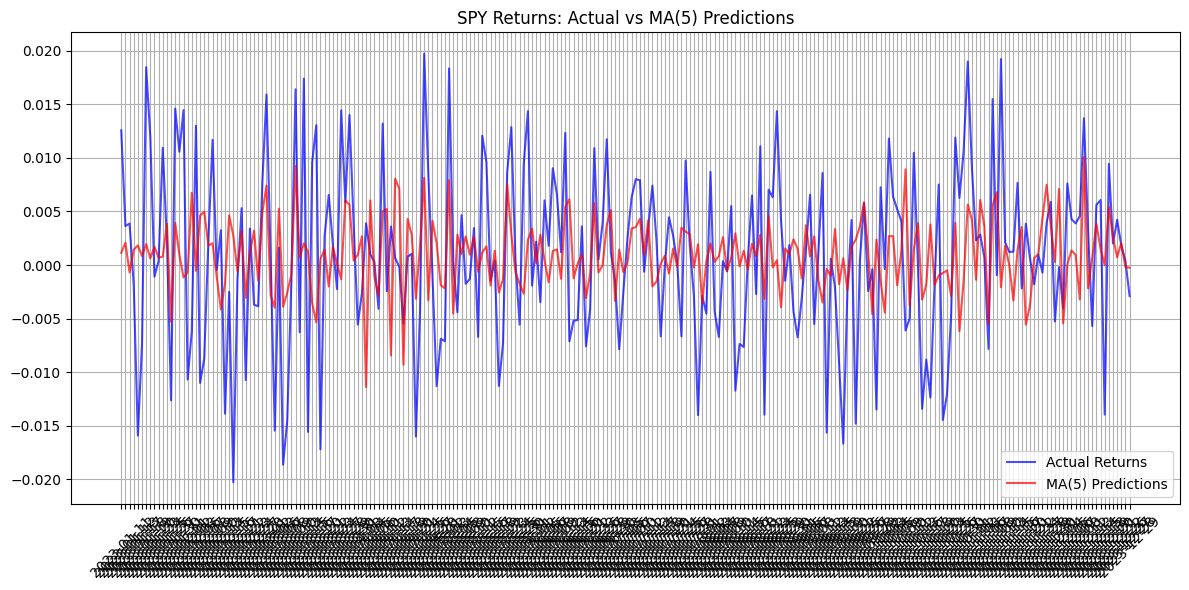


Model Statistics:
AIC: -1647.5075
BIC: -1570.1235

Moving Average Coefficients:
MA1: 0.0254
MA2: -0.0344
MA3: 0.0144
MA4: 0.0425
MA5: 0.0020
MA6: -0.0241
MA7: 0.0573
MA8: 0.0333
MA9: -0.0319
MA10: 0.0376
MA11: 0.0671
MA12: -0.0997
MA13: 0.0094
MA14: 0.1061
MA15: -0.2072
MA16: 0.0256
MA17: -0.0292
MA18: -0.0460
MA19: 0.0032
MA20: 0.2991


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Download data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = np.log(df['Close']/df['Close'].shift(1)).dropna()

# Convert returns to Series if it's a DataFrame and set frequency
if isinstance(returns, pd.DataFrame):
    returns = returns.squeeze()

# Set business day frequency
returns.index = pd.DatetimeIndex(returns.index).to_period('B')

# Fit MA model (order=(0,0,5) means MA(5))
model = ARIMA(returns, order=(0,0,20))
results = model.fit()

# Generate predictions
predictions = results.predict(start=5, end=len(returns)-1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(returns.index.astype(str)[5:], returns[5:], 'b-', label='Actual Returns', alpha=0.7)
plt.plot(predictions.index.astype(str), predictions, 'r-', label='MA(5) Predictions', alpha=0.7)
plt.title(f'{ticker} Returns: Actual vs MA(5) Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print model statistics
print("\nModel Statistics:")
print(f"AIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")
print("\nMoving Average Coefficients:")
for i, coef in enumerate(results.maparams, 1):
    print(f"MA{i}: {coef:.4f}")

# ARCH


In [15]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.6 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Returns shape: (249, 1)
First few returns: Ticker           SPY
Date                
2023-01-04  0.769054
2023-01-05 -1.147903
2023-01-06  2.267312
2023-01-09 -0.056706
2023-01-10  0.698837

Volatility shape: (249,)
Volatility range: 0.7182712087931782 to 1.0573412822984285

Model Parameters:
mu          0.085449
omega       0.007469
alpha[1]    0.000000
beta[1]     0.985093
Name: params, dtype: float64


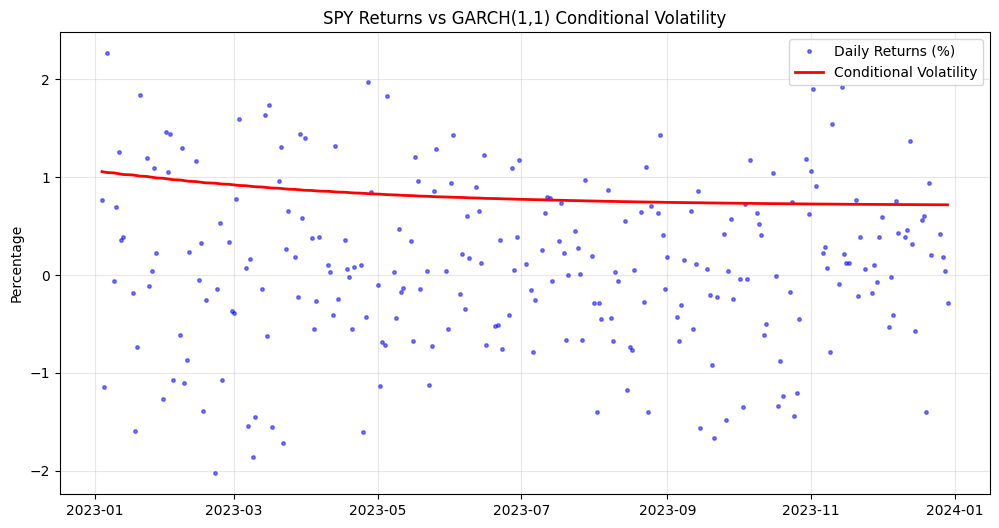

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

# Get data
ticker = "SPY"
df = yf.download(ticker, start="2023-01-01", end="2023-12-31")
returns = 100 * np.log(df['Close']/df['Close'].shift(1)).dropna()

# Print some diagnostics
print("Returns shape:", returns.shape)
print("First few returns:", returns.head())

# Fit GARCH(1,1) model instead of ARCH(1)
model = arch_model(returns, vol='GARCH', p=1, q=1)
results = model.fit(disp='off')

# Get conditional volatility
conditional_vol = results.conditional_volatility

# Print diagnostics about volatility estimates
print("\nVolatility shape:", conditional_vol.shape)
print("Volatility range:", np.min(conditional_vol), "to", np.max(conditional_vol))
print("\nModel Parameters:")
print(results.params)

# Plot
plt.figure(figsize=(12,6))
plt.plot(returns.index, returns, 'b.', label='Daily Returns (%)', alpha=0.5, markersize=5)
plt.plot(returns.index, conditional_vol, 'r-', label='Conditional Volatility', linewidth=2)
plt.title('SPY Returns vs GARCH(1,1) Conditional Volatility')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()